In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 80)
pd.set_option('max_rows', 6000)

# Stock Price Ratio Analysis
# Анализ соотношения цены акций КрасОкт-ао и КрасОкт-1п

данные взяты с <a href='https://www.finam.ru/analysis/export/'>Экспорт котировок___ФИНАМ</a>

### Акция КрасОкт-ао

In [3]:
df = pd.read_csv("KROT_190101_200727.csv",sep=';', header=0, index_col='<DATE>', parse_dates=True)

In [4]:
df = df.sort_values(by='<DATE>')

# столбец с изменением цены
df['returns']=(df['<CLOSE>']/df['<CLOSE>'].shift(1))-1
# процент
df['returns_pers']=((df['<CLOSE>']/df['<CLOSE>'].shift(1))-1)*100

df.head(4)

,<TICKER>,<PER>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,returns,returns_pers
<DATE>,,,,,,,,,,
2019-01-03,KROT,D,0,302.5,315.5,302.5,310.0,330,NaN,NaN
2019-01-04,KROT,D,0,316.5,320.0,305.5,310.0,840,0.000000,0.000000
2019-01-08,KROT,D,0,316.0,326.0,310.0,313.5,810,0.011290,1.129032
2019-01-09,KROT,D,0,316.0,334.5,316.0,317.0,910,0.011164,1.116427


### Акция КрасОкт-1п

In [5]:
df2 = pd.read_csv("KROTP_190101_200727.csv",sep=';', header=0, index_col='<DATE>', parse_dates=True)

In [6]:
df2 = df2.sort_values(by='<DATE>')

# столбец с изменением цены
df2['returns']=(df2['<CLOSE>']/df2['<CLOSE>'].shift(1))-1
# процент
df2['returns_pers']=((df2['<CLOSE>']/df2['<CLOSE>'].shift(1))-1)*100

df2.head(4)

,<TICKER>,<PER>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,returns,returns_pers
<DATE>,,,,,,,,,,
2019-01-03,KROTP,D,0,258.0,262.0,258.0,259.0,50,NaN,NaN
2019-01-08,KROTP,D,0,267.0,267.0,261.0,264.0,90,0.019305,1.930502
2019-01-09,KROTP,D,0,267.0,268.0,266.0,266.0,60,0.007576,0.757576
2019-01-10,KROTP,D,0,265.0,265.0,258.0,264.0,260,-0.007519,-0.751880


### Визуализация

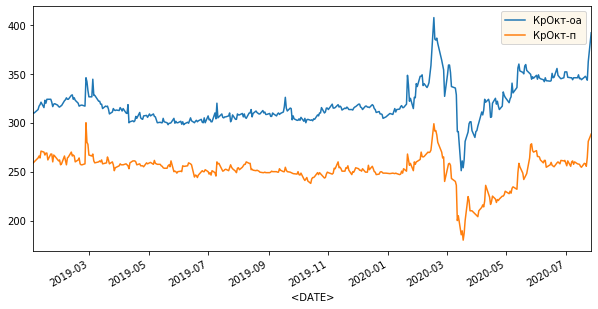

In [7]:
fig = plt.figure(figsize=[10, 5])
df['<CLOSE>'].plot(label='КрОкт-оа')
df2['<CLOSE>'].plot(label='КрОкт-п')
plt.legend(facecolor = 'oldlace')
plt.show()

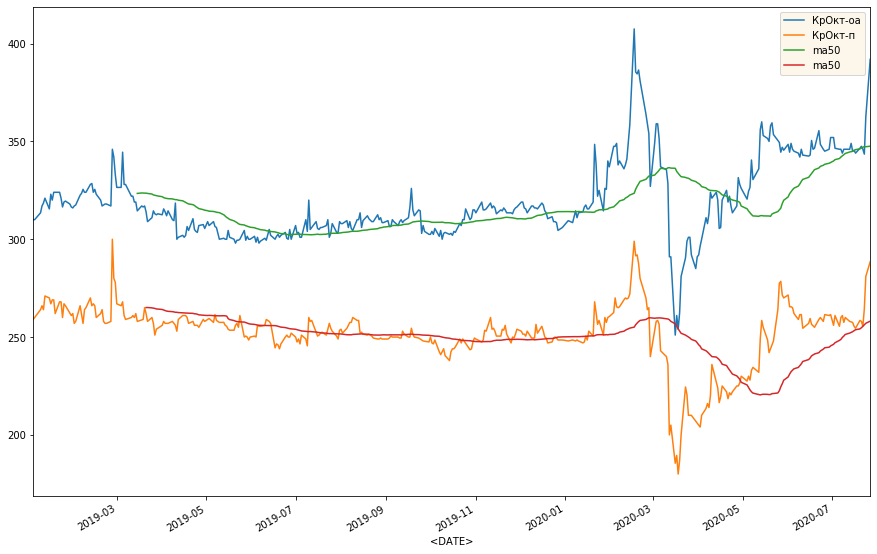

In [8]:
# котировки и их среднее (MA 50)
fig = plt.figure(figsize=[15, 10])

df['<CLOSE>'].plot(label='КрОкт-оа')
df2['<CLOSE>'].plot(label='КрОкт-п')
df['ma50'] = df['<OPEN>'].rolling(50).mean().plot(label='ma50')
df2['ma50'] = df2['<OPEN>'].rolling(50).mean().plot(label='ma50')
plt.legend(facecolor = 'oldlace')
plt.show()

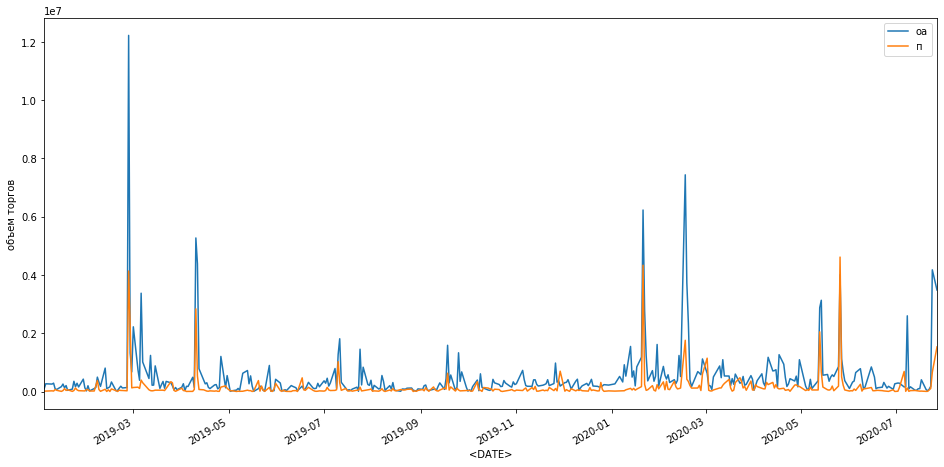

In [9]:
# оборот по акциям
df['total_trade'] = df['<OPEN>']*df['<VOL>']
df2['total_trade'] = df2['<OPEN>']*df2['<VOL>']
df['total_trade'].plot(label='оа',figsize=(16,8))
df2['total_trade'].plot(label='п',figsize=(16,8))
plt.legend()
plt.ylabel('объем торгов')
plt.show()

### Анализ корреляций

In [13]:
allSet = pd.concat([df['<OPEN>'],df2['<OPEN>']],axis=1)
allSet.columns = ['k_open','kp_open']
allSet.head(1)

,k_open,kp_open
<DATE>,,
2019-01-03,302.5,258.0


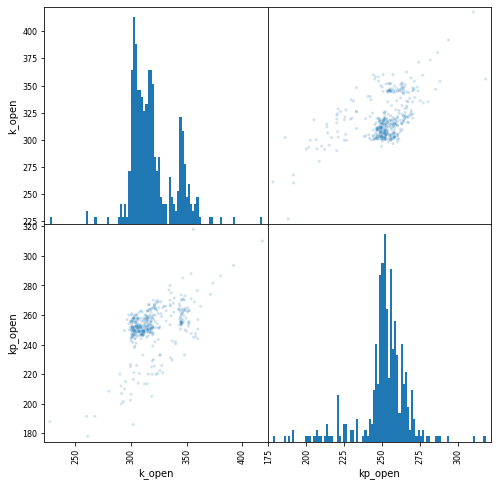

In [14]:
scatter_matrix(allSet,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});
plt.show()

### Волатильность бумаг 

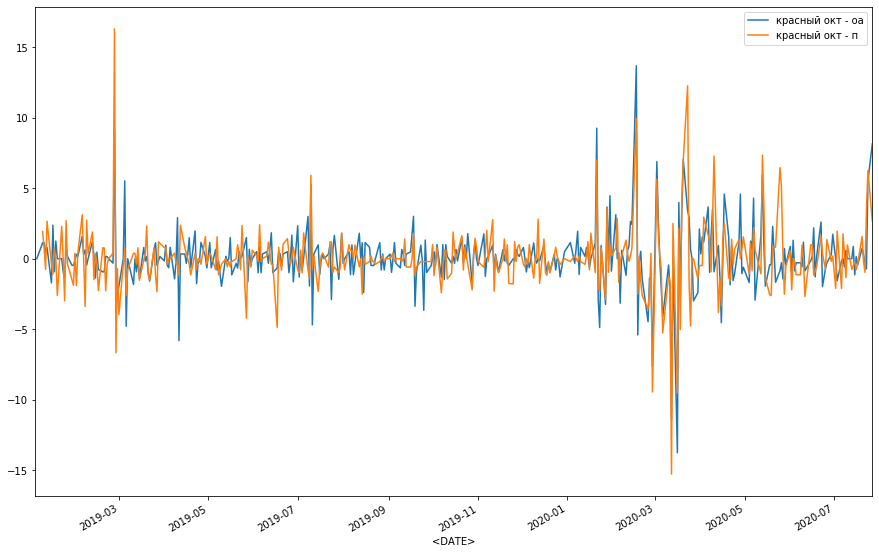

In [15]:
fig = plt.figure(figsize=[15, 10])
df['returns_pers'].plot(label='красный окт - оа')
df2['returns_pers'].plot(label='красный окт - п')
plt.legend()
plt.show()

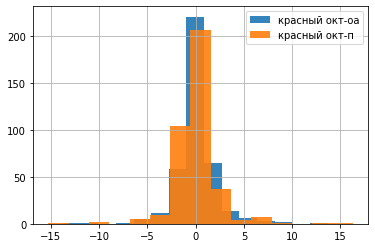

In [18]:
df['returns_pers'].hist(bins=15,label='красный окт-оа',alpha=0.9)
df2['returns_pers'].hist(bins=15,label='красный окт-п',alpha=0.9)
plt.legend()
plt.show()

### Накопленный доход

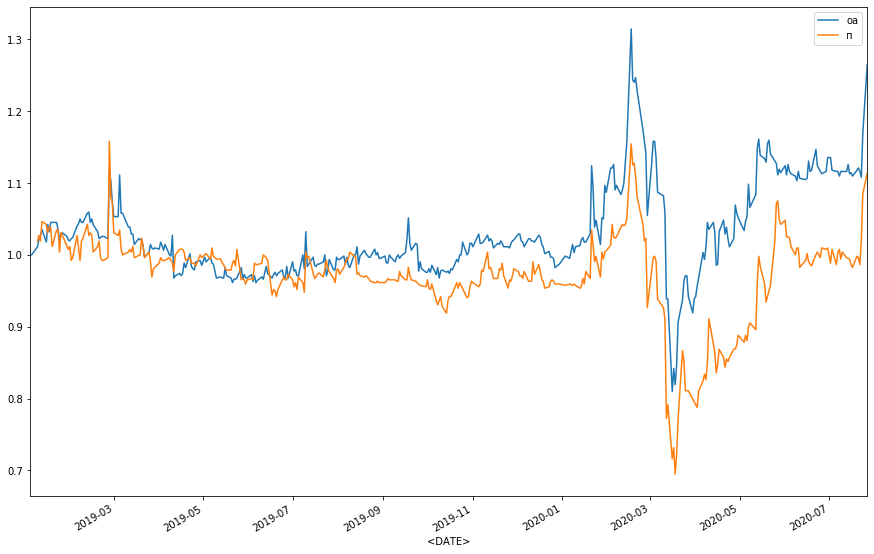

In [16]:
fig = plt.figure(figsize=[15, 10])

# изменение стоимости акций в процентах
df['Cumulative Return'] = (1+ df['returns']).cumprod()
df2['Cumulative Return'] = (1+ df2['returns']).cumprod()

df['Cumulative Return'].plot(label='оа')
df2['Cumulative Return'].plot(label='п')
plt.legend()
plt.show()